In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb

### Wczytanie i poznanie danych, które będą przedmiotem analizy

Wczytanie danych z pliku do obiektu Data Frame.

In [2]:
df = pd.read_csv('./data/ames2000_NAfix.csv')
df.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,9,2006,New,Partial,342643


In [3]:
df.shape

(2000, 80)

Ponieważ domyślnie obiekt Data Frame pokazuje tylko niektóre początkowe i końcowe kolumny, zwiększam parametry max_colums, max_rows co pozwoli przegląd pełnego zakresu danych, także po transpozycji.

In [4]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)

In [5]:
df.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,1302,0,0,1302,1,0,1,1,1,1,Gd,5,Typ,1,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,110,50,0,0,0,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,None,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,8,1972,2003,Gable,CompShg,WdShing,HdBoard,None,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,768,0,0,768,0,1,1,0,2,1,TA,5,Typ,0,None,Detchd,1974,Fin,1,396,TA,TA,Y,192,0,0,0,0,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,None,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,1249,1347,0,2596,0,0,3,1,4,1,Gd,9,Typ,0,None,Attchd,2006,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,None,None,None,0,9,2006,New,Partial,342643


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MS.SubClass,2000.0,56.9450,42.699281,20.0,20.00,50.0,70.00,190.0
Lot.Area,2000.0,10296.6650,8828.208491,1300.0,7500.00,9465.0,11500.00,215245.0
Overall.Qual,2000.0,6.0820,1.387169,1.0,5.00,6.0,7.00,10.0
Overall.Cond,2000.0,5.5740,1.105502,1.0,5.00,5.0,6.00,9.0
Year.Built,2000.0,1971.0795,29.985426,1872.0,1954.00,1972.0,2000.00,2010.0
Year.Remod.Add,2000.0,1984.0135,20.881771,1950.0,1965.00,1993.0,2004.00,2010.0
X1st.Flr.SF,2000.0,1158.7155,379.701015,407.0,877.75,1088.0,1391.25,4692.0
X2nd.Flr.SF,2000.0,334.3805,427.519973,0.0,0.00,0.0,703.25,2065.0
Low.Qual.Fin.SF,2000.0,4.3790,42.555738,0.0,0.00,0.0,0.00,697.0
Gr.Liv.Area,2000.0,1497.4750,498.561719,407.0,1126.75,1447.5,1734.00,5642.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
MS.SubClass        2000 non-null int64
MS.Zoning          2000 non-null object
Lot.Frontage       2000 non-null object
Lot.Area           2000 non-null int64
Street             2000 non-null object
Alley              2000 non-null object
Lot.Shape          2000 non-null object
Land.Contour       2000 non-null object
Utilities          2000 non-null object
Lot.Config         2000 non-null object
Land.Slope         2000 non-null object
Neighborhood       2000 non-null object
Condition.1        2000 non-null object
Condition.2        2000 non-null object
Bldg.Type          2000 non-null object
House.Style        2000 non-null object
Overall.Qual       2000 non-null int64
Overall.Cond       2000 non-null int64
Year.Built         2000 non-null int64
Year.Remod.Add     2000 non-null int64
Roof.Style         2000 non-null object
Roof.Matl          2000 non-null object
Exterior.1st       

### Oczyszczanie danych - usuwanie braków oraz wartości null

W pierwszej kolejności sprawdzam, w których kolumnach występują wartości null, czyli 'NaN'.

In [8]:
def containsNulls(df):
    contains_nulls = df.columns[df.isna().any() == True]
    return contains_nulls

In [9]:
contains_nulls = containsNulls(df)
contains_nulls

Index(['Mas.Vnr.Type', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Garage.Finish', 'Garage.Qual',
       'Garage.Cond'],
      dtype='object')

Istnieje 9 kolumn zawierających wartości null. Braki dotyczą cech piwnicy i garażu oraz forniru murarskiego. W kolejnym kroku sprawdzam jakie są unikalne wartości dla tych kolumn.

In [10]:
def uniqueValuesInContainsNulls(df, list):
    for item in list:
        print(item, ':', df[item].unique())

In [11]:
uniqueValuesInContainsNulls(df, contains_nulls)

Mas.Vnr.Type : ['Stone' 'None' 'BrkFace' nan 'BrkCmn' 'CBlock']
Bsmt.Qual : ['Gd' 'TA' 'None' 'Ex' 'Fa' nan 'Po']
Bsmt.Cond : ['TA' 'None' 'Gd' 'Fa' 'Ex' nan 'Po']
Bsmt.Exposure : ['Av' 'No' 'None' 'Gd' 'Mn' nan]
BsmtFin.Type.1 : ['ALQ' 'GLQ' 'None' 'Unf' 'LwQ' 'Rec' 'BLQ' nan]
BsmtFin.Type.2 : ['Unf' 'Rec' 'None' 'GLQ' 'ALQ' 'LwQ' 'BLQ' nan]
Garage.Finish : ['RFn' 'Fin' 'Unf' 'None' nan]
Garage.Qual : ['TA' 'None' 'Fa' 'Gd' nan 'Po' 'Ex']
Garage.Cond : ['TA' 'None' 'Gd' 'Fa' 'Po' nan 'Ex']


Po analizie list wartości dla poszczególnych pól przyjmuję założenie, że brak informacji oznaczać będzie brak cechy. Dlatego brakujące wartości zostaną uzupełnione wartością None.

In [12]:
def fillNullByNone(df, contains_nulls):
    for item in contains_nulls:
        df[item] = df[item].fillna('None')

In [13]:
fillNullByNone(df, contains_nulls)

Ponowne sprawdzam, czy wszystkie modyfikowane kolumny zawierają wartości różne od null.

In [14]:
df[contains_nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Mas.Vnr.Type      2000 non-null object
Bsmt.Qual         2000 non-null object
Bsmt.Cond         2000 non-null object
Bsmt.Exposure     2000 non-null object
BsmtFin.Type.1    2000 non-null object
BsmtFin.Type.2    2000 non-null object
Garage.Finish     2000 non-null object
Garage.Qual       2000 non-null object
Garage.Cond       2000 non-null object
dtypes: object(9)
memory usage: 140.7+ KB


W zbiorze obecnie brak już wartości null. Sprawdzam liczbę unikalnych wartości dla każdej z kolumn.

In [15]:
def dfTypesAndUniques(df):
    types = df.dtypes
    nunique = df.nunique()
    df_info = pd.DataFrame(pd.concat([types, nunique], axis =1))
    df_info = df_info.rename(columns={0:'Type', 1:'Num_unique'}).sort_values(by='Num_unique', ascending=False)
    return df_info

In [16]:
df_info = dfTypesAndUniques(df)
df_info

,Type,Num_unique
Lot.Area,int64,1424
Gr.Liv.Area,int64,1051
Bsmt.Unf.SF,object,928
X1st.Flr.SF,int64,902
Total.Bsmt.SF,object,871
BsmtFin.SF.1,object,817
SalePrice,int64,812
Garage.Area,object,531
X2nd.Flr.SF,int64,500
Mas.Vnr.Area,object,363


Rozdzielam dane numeryczne od tekstowych. 

In [17]:
def numericAndTextData(df_info):
    df_numeric = df_info[df_info['Type'] == 'int64']
    df_text = df_info[df_info['Type'] == 'object']
    print(f'Amount of numeric data: {len(df_numeric)}, Amount of text data: {len(df_text)}')

    numeric = df_numeric.index
    text = df_text.index
    return (numeric, text)

In [36]:
numeric, text = numericAndTextData(df_info)
print(f'Numeric columns: {numeric}')
print(f'Text columns: {text}')

Amount of numeric data: 26, Amount of text data: 54
Numeric columns: Index(['Lot.Area', 'Gr.Liv.Area', 'X1st.Flr.SF', 'SalePrice', 'X2nd.Flr.SF',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'Year.Built',
       'Screen.Porch', 'Year.Remod.Add', 'Misc.Val', 'Low.Qual.Fin.SF',
       'X3Ssn.Porch', 'MS.SubClass', 'Mo.Sold', 'Pool.Area', 'TotRms.AbvGrd',
       'Overall.Qual', 'Overall.Cond', 'Bedroom.AbvGr', 'Fireplaces',
       'Full.Bath', 'Yr.Sold', 'Kitchen.AbvGr', 'Half.Bath'],
      dtype='object')
Text columns: Index(['Bsmt.Unf.SF', 'Total.Bsmt.SF', 'BsmtFin.SF.1', 'Garage.Area',
       'Mas.Vnr.Area', 'BsmtFin.SF.2', 'Lot.Frontage', 'Garage.Yr.Blt',
       'Neighborhood', 'Exterior.2nd', 'Exterior.1st', 'Sale.Type',
       'Condition.1', 'House.Style', 'Functional', 'Garage.Type',
       'Garage.Cars', 'MS.Zoning', 'Condition.2', 'Roof.Matl',
       'BsmtFin.Type.2', 'BsmtFin.Type.1', 'Heating', 'Roof.Style',
       'Garage.Cond', 'Bsmt.Cond', 'Bsmt.Qual', 'Fireplac

Sprawdzam, czy wśród kolumn tekstowych znajdują się podejrzane kolumny, zawierające po kilkaset unikalnych wartości. Należy im się przyjrzeć bliżej.

In [19]:
def checkTextValues(df, text_columns_list):
    for item in text_columns_list:
        print(item, ':', df[item].unique())

In [20]:
checkTextValues(df, text)

Bsmt.Unf.SF : ['436' '0' '108' '1249' '560' '576' '125' '634' '912' '894' '305' '869'
 '970' '636' '1836' '195' '497' '526' '726' '1615' '100' '768' '253' '94'
 '398' '1028' '440' '34' '331' '240' '860' '210' '466' '589' '286' '994'
 '918' '1348' '434' '715' '140' '384' '794' '1459' '99' '354' '127' '244'
 '1696' '1264' '704' '201' '686' '662' '1141' '455' '1005' '1632' '252'
 '1421' '171' '1541' '1580' '460' '268' '169' '896' '938' '1420' '960'
 '903' '849' '307' '237' '162' '1686' '130' '399' '1181' '784' '414'
 '1280' '564' '115' '1008' '92' '710' '917' '1560' '1040' '585' '52' '386'
 '491' '1286' '200' '1026' '534' '1228' '144' '728' '675' '238' '480'
 '160' '1242' '1088' '884' '458' '637' '182' '278' '578' '355' '280' '300'
 '413' '756' '746' '658' '724' '544' '103' '1680' '880' '712' '1357' '161'
 '325' '378' '176' '750' '245' '290' '808' '522' '133' '664' '192' '672'
 '939' '132' '731' '113' '1528' '308' '625' '484' '223' '1694' '28' '718'
 '476' '415' '770' '420' '630' '126' '8

Okazuje się, że wśród danych tekstowych znalazły się także kolumny zawierające tak naprawdę dane numeryczne, ale także wartość 'None'. 
W przypadku kolumn 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'BsmtFin.SF.1', 'Garage.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.2', cechy garażu i piwnicy z wartością 'None' zostaną zastąpione wartością 0. Dane w wymienionych kolumnach są podawane w jednostce SF (stopy kwadratowe), dlatego zamiana na zero nie wpłynie na interpretację danych.

Po zamianie wartości, zmieniony zostanie także typ kolumny na int64. Krok jest niezbędny do kolejnego etapu - wytrenowania modelu. 

In [21]:
def changeNoneToZeroForAreasData(df, lst):
    for item in lst:
        df.loc[df[item][df[item] == 'None'].index, item ] = 0
        df[item] = df[item].astype('int64')
    return

In [22]:
lst_zero = ['Bsmt.Unf.SF', 'Total.Bsmt.SF', 'BsmtFin.SF.1', 'Garage.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.2']
changeNoneToZeroForAreasData(df, lst_zero)

Kolumna 'Lot.Frontage' oznacza liczbę stóp od ulicy, nie można zatem wstawić zera, gdyż żaden dom nie może stać na krawędzi ulicy. W celu uzupełnienia danych zostanie wstawiona średnia liczba stóp od ulicy, wyliczona z danych pozostałych domów. Następnie typ danych również zostanie zamieniony na typ int64.

In [23]:
def changeNoneToMeanForNotAreaData(df, lst):
    for item in lst:
        get_item_values = df[item][df[item] != 'None'].values
        item_mean = get_item_values.astype(np.int64).mean().astype(np.int64)
        df.loc[df[item][df[item] == 'None'].index, item] = item_mean
        df[item] = df[item].astype('int64')
    return item_mean

In [24]:
lst_mean = ['Lot.Frontage']
changeNoneToMeanForNotAreaData(df, lst_mean)

69

W przypadku kolumny 'Garage.Yr.Blt' jako rok budowy garażu, dla budynków, dla których nie podano tej wartości, zostanie przyjęty rok budowy danego budynku tzn. 'Year.Built'. Typ danych tutaj także zostanie zamieniony na int64.

In [25]:
def changeNoneToYear(df, lst, year):
    for item in lst:
        df.loc[df[item][df[item] == 'None'].index, item] = df.loc[df[item][df[item] == 'None'].index, year]
        df[item] = df[item].astype('int64')
    return

In [26]:
lst_year = ['Garage.Yr.Blt']
year = 'Year.Built'
changeNoneToYear(df,lst_year, year)

In [27]:
numeric, text = numericAndTextData(df_info)
print(f'Numeric columns: {numeric}')
print(f'Text columns: {text}')

Amount of numeric data: 26, Amount of text data: 54
Numeric columns: Index(['Lot.Area', 'Gr.Liv.Area', 'X1st.Flr.SF', 'SalePrice', 'X2nd.Flr.SF',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'Year.Built',
       'Screen.Porch', 'Year.Remod.Add', 'Misc.Val', 'Low.Qual.Fin.SF',
       'X3Ssn.Porch', 'MS.SubClass', 'Mo.Sold', 'Pool.Area', 'TotRms.AbvGrd',
       'Overall.Qual', 'Overall.Cond', 'Bedroom.AbvGr', 'Fireplaces',
       'Full.Bath', 'Yr.Sold', 'Kitchen.AbvGr', 'Half.Bath'],
      dtype='object')
Text columns: Index(['Bsmt.Unf.SF', 'Total.Bsmt.SF', 'BsmtFin.SF.1', 'Garage.Area',
       'Mas.Vnr.Area', 'BsmtFin.SF.2', 'Lot.Frontage', 'Garage.Yr.Blt',
       'Neighborhood', 'Exterior.2nd', 'Exterior.1st', 'Sale.Type',
       'Condition.1', 'House.Style', 'Functional', 'Garage.Type',
       'Garage.Cars', 'MS.Zoning', 'Condition.2', 'Roof.Matl',
       'BsmtFin.Type.2', 'BsmtFin.Type.1', 'Heating', 'Roof.Style',
       'Garage.Cond', 'Bsmt.Cond', 'Bsmt.Qual', 'Fireplac

W kolejnym kroku analizie zostaną poddane dane tekstowe. Sprawdzam jakie wartości unikalne występują dla każdej z kolumn.

In [28]:
for item in text:
    print(item, ':', df[item].unique())

Bsmt.Unf.SF : [ 436    0  108 1249  560  576  125  634  912  894  305  869  970  636
 1836  195  497  526  726 1615  100  768  253   94  398 1028  440   34
  331  240  860  210  466  589  286  994  918 1348  434  715  140  384
  794 1459   99  354  127  244 1696 1264  704  201  686  662 1141  455
 1005 1632  252 1421  171 1541 1580  460  268  169  896  938 1420  960
  903  849  307  237  162 1686  130  399 1181  784  414 1280  564  115
 1008   92  710  917 1560 1040  585   52  386  491 1286  200 1026  534
 1228  144  728  675  238  480  160 1242 1088  884  458  637  182  278
  578  355  280  300  413  756  746  658  724  544  103 1680  880  712
 1357  161  325  378  176  750  245  290  808  522  133  664  192  672
  939  132  731  113 1528  308  625  484  223 1694   28  718  476  415
  770  420  630  126  858  150  796 1041  952  231  425  450  456  565
  274  410  363  404  948 1330  208   46  616  232  294  501  586   48
 1706  322  780  722   55  874 1685 1105  599   80  151  316  1

Korzystam z metody LabelEncoder, która pozwoli na zamianę kategorii tekstowych na numeryczne.

In [29]:
def changeObjectValueToNumber(df): 
    for item in df.columns:
    #     df[item]=df[item].fillna(-1) # Imp. for both encoder and regressor. They don't like NaNs.
        if df[item].dtype == 'object':
            le = preprocessing.LabelEncoder()
            df[item] = le.fit_transform(df[item].astype('str'))
    return

In [30]:
changeObjectValueToNumber(df)

In [31]:
for item in text:
    print(item, ':', df[item].unique())

Bsmt.Unf.SF : [ 436    0  108 1249  560  576  125  634  912  894  305  869  970  636
 1836  195  497  526  726 1615  100  768  253   94  398 1028  440   34
  331  240  860  210  466  589  286  994  918 1348  434  715  140  384
  794 1459   99  354  127  244 1696 1264  704  201  686  662 1141  455
 1005 1632  252 1421  171 1541 1580  460  268  169  896  938 1420  960
  903  849  307  237  162 1686  130  399 1181  784  414 1280  564  115
 1008   92  710  917 1560 1040  585   52  386  491 1286  200 1026  534
 1228  144  728  675  238  480  160 1242 1088  884  458  637  182  278
  578  355  280  300  413  756  746  658  724  544  103 1680  880  712
 1357  161  325  378  176  750  245  290  808  522  133  664  192  672
  939  132  731  113 1528  308  625  484  223 1694   28  718  476  415
  770  420  630  126  858  150  796 1041  952  231  425  450  456  565
  274  410  363  404  948 1330  208   46  616  232  294  501  586   48
 1706  322  780  722   55  874 1685 1105  599   80  151  316  1

Ponownie sprawdzam typy danych oraz liczbę wartości unikalnych dla każdej z kolumn.

In [32]:
df_info_after_conv = dfTypesAndUniques(df)
df_info_after_conv

,Type,Num_unique
Lot.Area,int64,1424
Gr.Liv.Area,int64,1051
Bsmt.Unf.SF,int64,927
X1st.Flr.SF,int64,902
Total.Bsmt.SF,int64,870
BsmtFin.SF.1,int64,816
SalePrice,int64,812
Garage.Area,int64,530
X2nd.Flr.SF,int64,500
Mas.Vnr.Area,int64,362


### Podsumowanie etapu czyszczenia zbioru danych - za pomocą jednej funkcji

Reasumując, przed rozpoczęciem trenowania modelu należy oczyścić dane, na przykład w taki sposób aby puste wartości zastąpić wartością domyślną 'None' lub średnią z istniejących danych.
W tym celu wystarczy nowy zbiór danych przepuścić przez metodę:

In [33]:
def cleaningData(df):
    lst_nulls = ['Mas.Vnr.Type', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure','BsmtFin.Type.1', 'BsmtFin.Type.2', 
                 'Garage.Finish', 'Garage.Qual','Garage.Cond']
    lst_zero = ['Bsmt.Unf.SF', 'Total.Bsmt.SF', 'BsmtFin.SF.1', 'Garage.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.2']
    lst_mean = ['Lot.Frontage']
    lst_year = ['Garage.Yr.Blt']
    year = 'Year.Built'

    fillNullByNone(df, lst_nulls)
    changeNoneToZeroForAreasData(df, lst_zero)
    changeNoneToMeanForNotAreaData(df, lst_mean)
    changeNoneToYear(df,lst_year, year)
    changeObjectValueToNumber(df)
    result = dfTypesAndUniques(df)
    return result

### Korelacje liniowe

Przed rozpoczęciem uczenia modelu, sprawdzam co jeszcze można wyciągnąć z badanego zbioru danych - czy występują jakieś korelacje liniowe.

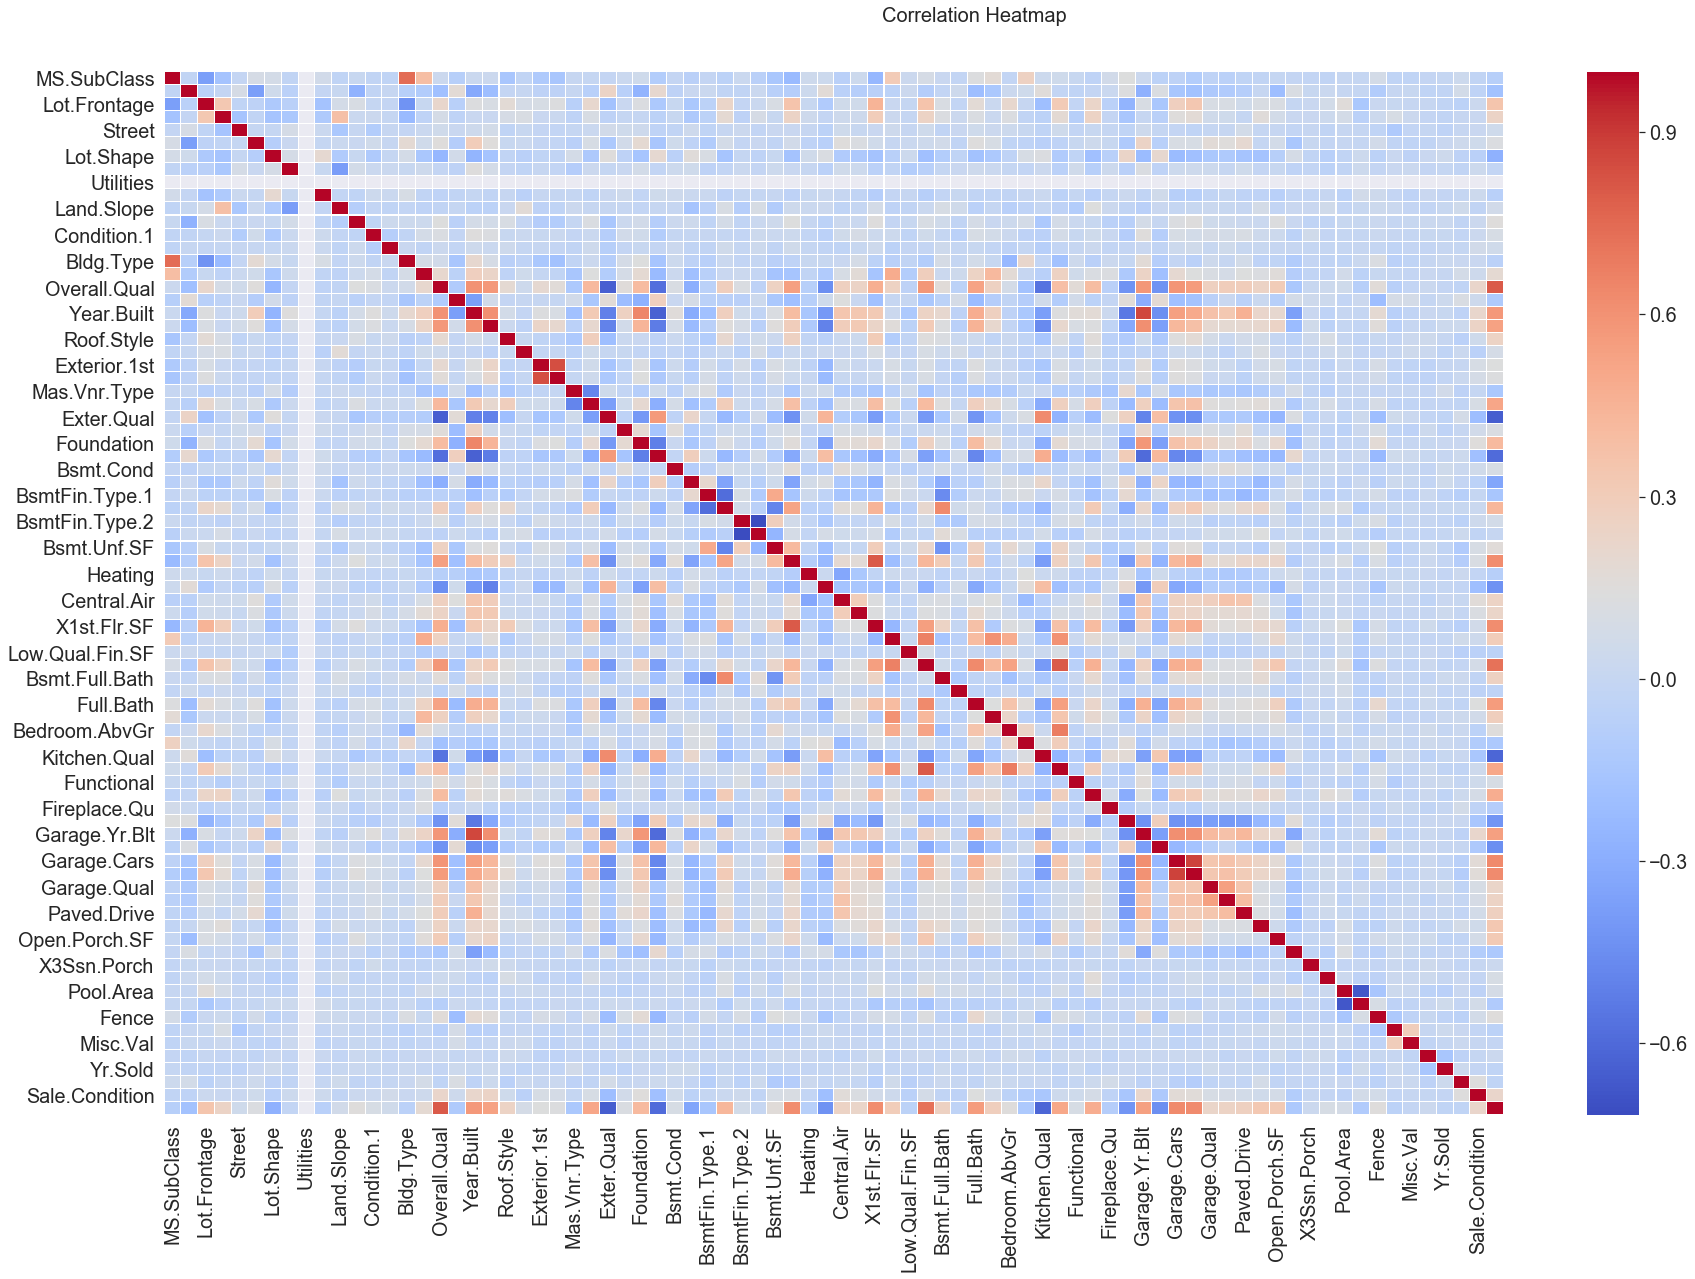

In [34]:
sns.set(style='darkgrid', font_scale=1.8)
fig, ax = plt.subplots(figsize=(30, 18))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm",fmt='.2f',linewidths=.05 )
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', fontsize=20)
plt.show()

Sprawdzam, które kolumny są najbardziej skorelowane z 'SalePrice', tzn. powyżej 0.50 lub poniżej -0.50

In [37]:
# df_most_correlated_cols_num = pd.DataFrame(df[numeric].corr().SalePrice.sort_values())
# df_most_correlated_cols_num = df_most_correlated_cols_num[df_most_correlated_cols_num['SalePrice'].between(-0.50, 0.50, inclusive = False) == False]
# df_most_correlated_cols_num

df_most_correlated_cols = pd.DataFrame(df.corr().SalePrice.sort_values())
df_most_correlated_cols = df_most_correlated_cols[df_most_correlated_cols['SalePrice'].between(-0.50, 0.50, inclusive = False) == False]
df_most_correlated_cols

,SalePrice
Exter.Qual,-0.648237
Kitchen.Qual,-0.612648
Bsmt.Qual,-0.593063
TotRms.AbvGrd,0.504280
Mas.Vnr.Area,0.514974
Year.Remod.Add,0.534962
Garage.Yr.Blt,0.541022
Full.Bath,0.561228
Year.Built,0.571716
X1st.Flr.SF,0.619121


Przedmiotem analizy jest przede wszystkim znalezienie korelacji zmiennej 'SalePrice' z innymi zmiennymi. Jednakże na heatmapie można zauważyć szereg innych korelacji, m.in. ogólnego stanu domu ('Overall.Cond) do roku budowy ('Year.Built').

Można zauważyć pozytywną korelację liniową (powyżej 0.50) zmiennej 'SalePrice' ze zmniennymi:
'TotRms.AbvGrd', 'Mas.Vnr.Area', 'Year.Remod.Add', 'Garage.Yr.Blt', 'Full.Bath', 'Year.Built', 'X1st.Flr.SF', 'Total.Bsmt.SF', 'Garage.Area', 'Gr.Liv.Area', 'Overall.Qual'.

A także słabe negatywne korelacje z pozostałymi zmiennymi. Brak wyraźnej negatywnej korelacji liniowej.
Najsilniejsza jest korelacja ceny 'SalePrice' z 'Gr.Liv.Area', 'Overall.Qual'.

Weryfikuję jak korelacje wyglądają na pairplocie. Dla lepszego zrozumienia korelacji dzielę 'SalePrice' na 4 grupy wg kwantyli.

In [38]:
def priceQuantile(series):
    price25 = series.quantile(0.25)
    price50 = series.quantile(0.50)
    price75 = series.quantile(0.75)

    price_quantile = []
    for value in series:
        if 0 < value < price25:
            price_category = 'very low'
        elif price25 <= value < price50:
            price_category = 'low'
        elif price50 <= value < price75:
            price_category = 'medium'
        else:
            price_category = 'expensive'
        price_quantile.append(price_category)
    return price_quantile

In [39]:
df['SalePriceQuantile'] = priceQuantile(df['SalePrice'])
df['SalePriceQuantile'].head()

0       medium
1     very low
2          low
3     very low
4    expensive
Name: SalePriceQuantile, dtype: object

C:\Users\Edyta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Edyta\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Edyta\Anaconda3\lib\site-packages\statsm

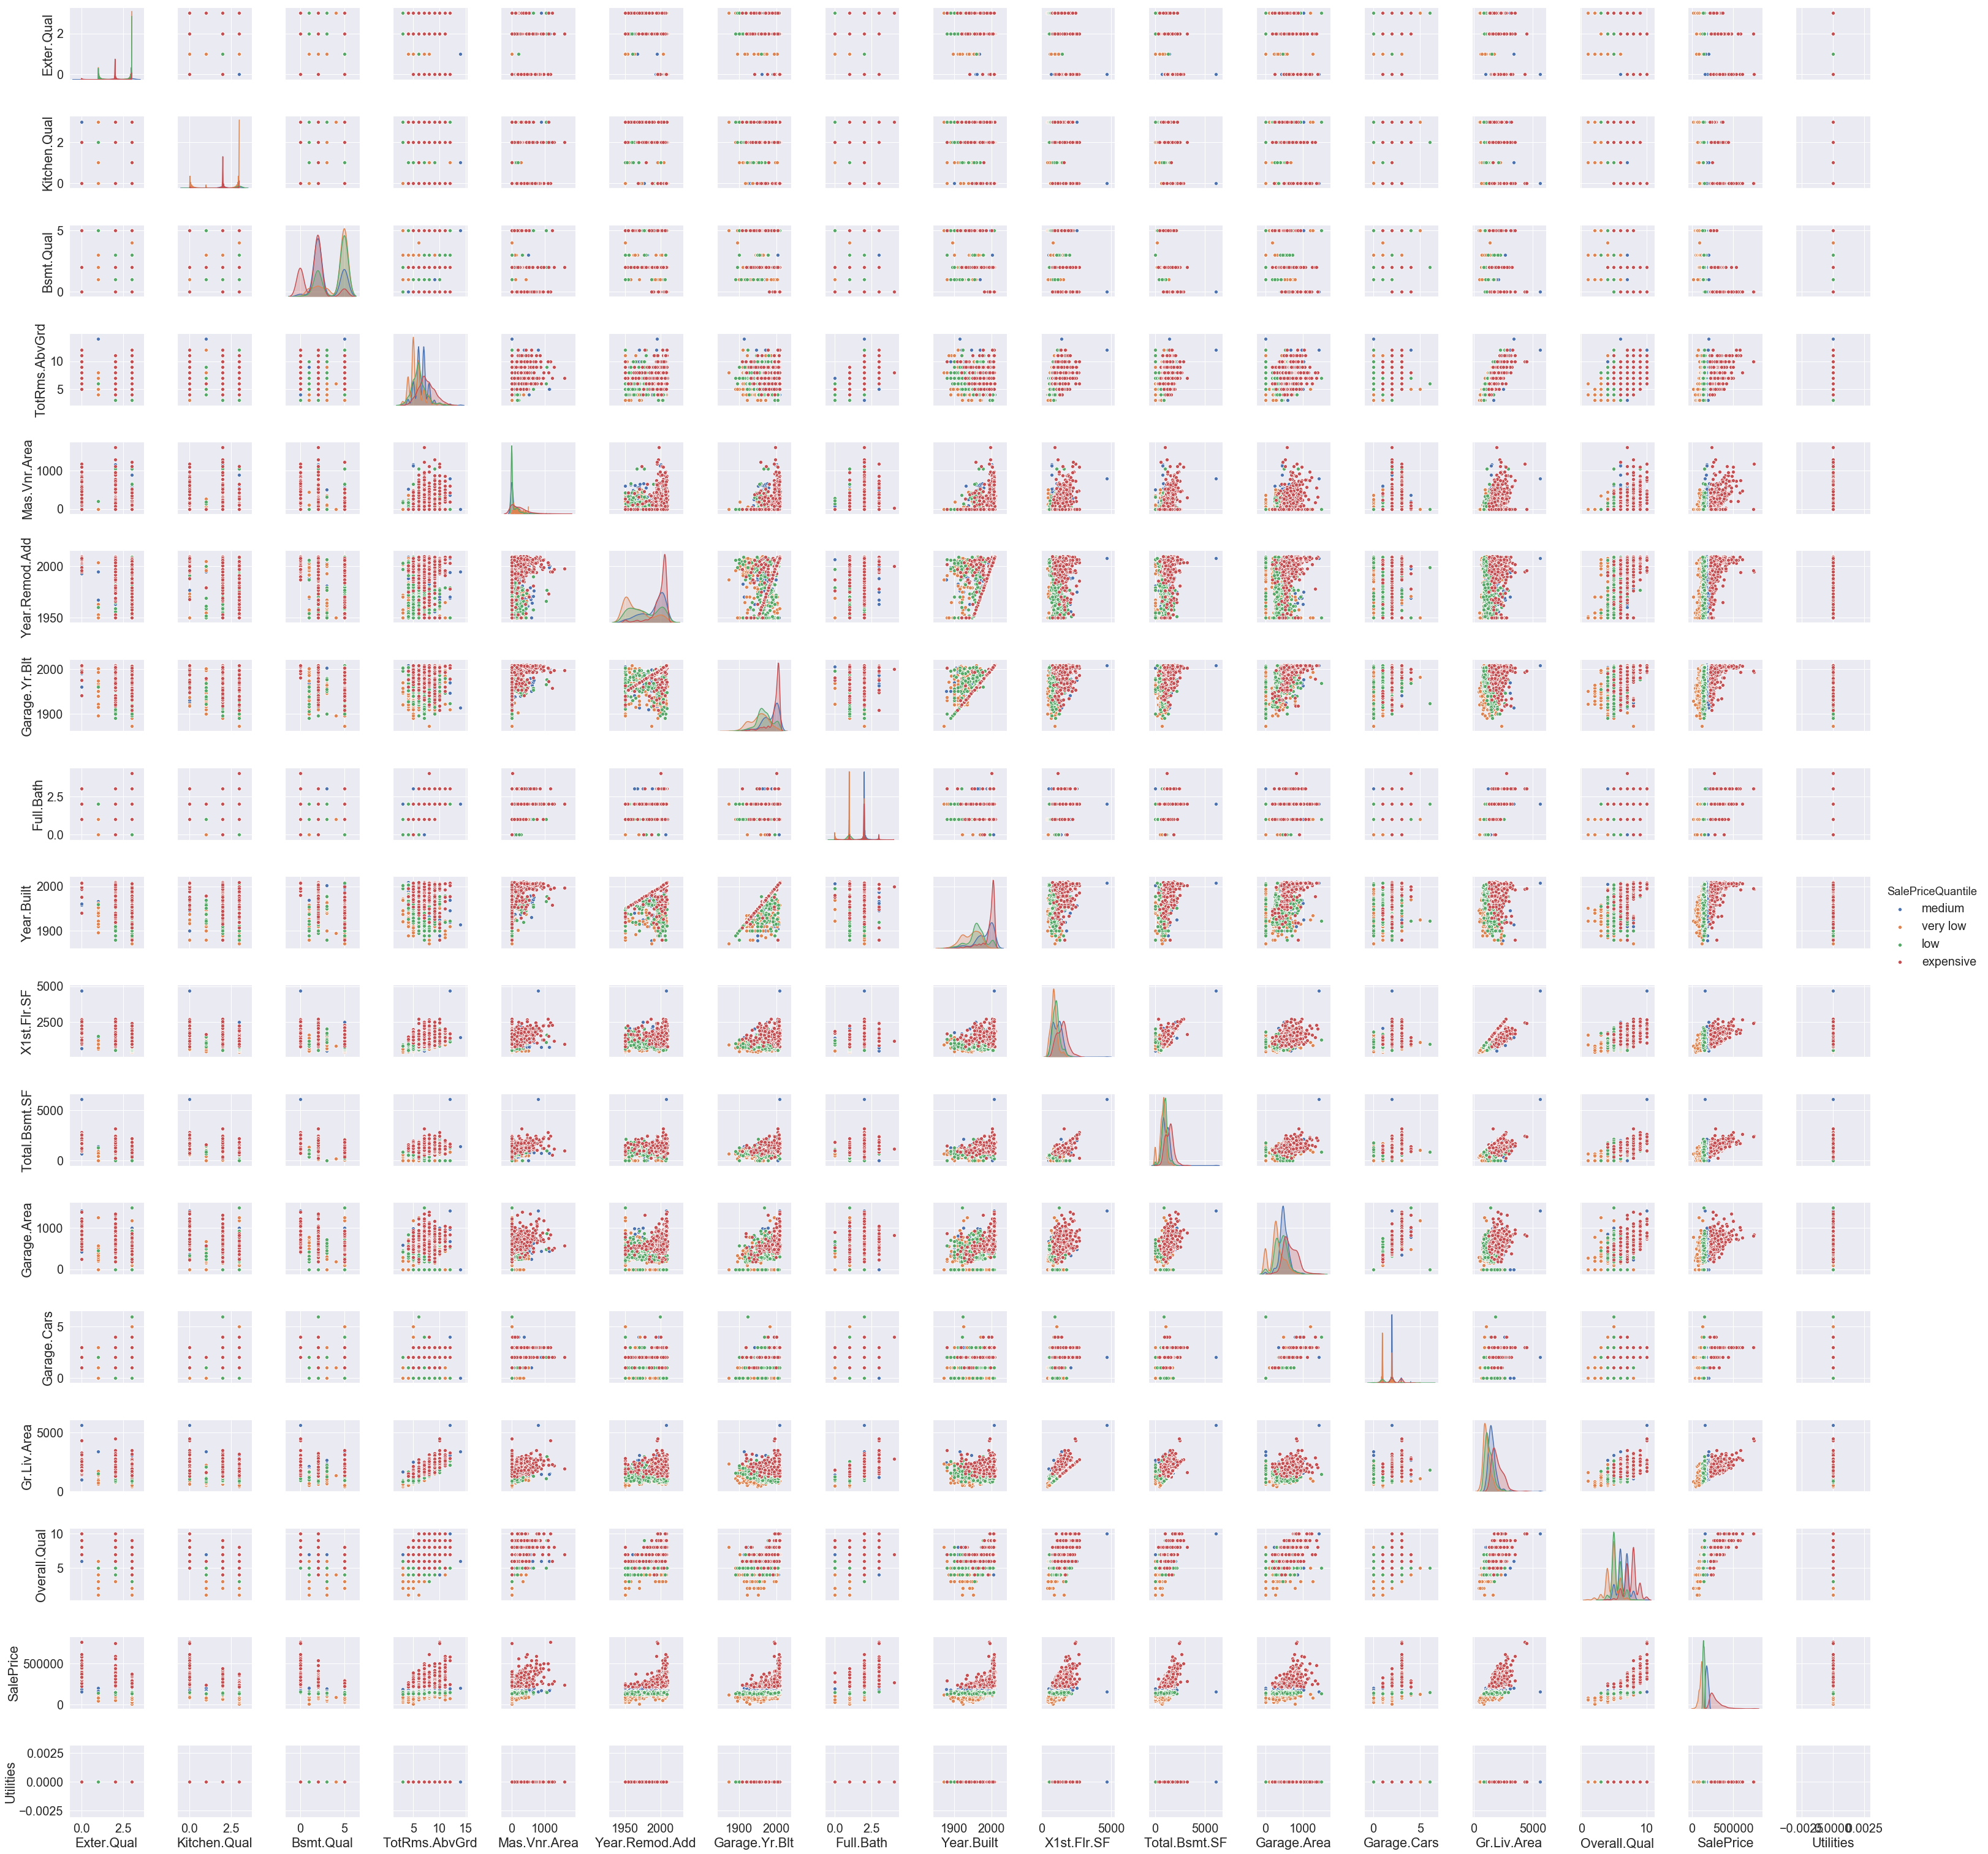

In [40]:
df_corr = df[df_most_correlated_cols.index]
df_corr['SalePriceQuantile'] = df['SalePriceQuantile']
sns.pairplot(data=df_corr, hue='SalePriceQuantile')
plt.show()

In [ ]:
# df['SalePrice'].plot.hist()
sns.distplot(df['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

Ponieważ w kolejnych krokach na danych zostaną wykonane pewne przekształcenia oraz uzupełnienia w brakach danych, to na tym etapie nastąpi podział danych na treningowe i testowe.
Przyjmuję podział 70% na train oraz 30% na test. Na wszelki wypadek tworzę kopię zapasową danych.
Ponadto usuwam dane tzw. 'information leaks'

In [ ]:
df_train = df.drop(['SalePrice', 'Mo.Sold','Yr.Sold','Sale.Type','Sale.Condition'], axis=1)
df_test = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size = 0.3, random_state=42)

In [ ]:
X_train.head()